In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)
    
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Layer, Input

In [2]:
model_name = 'efficientnet'

cifar100_model_feat = np.load(f'./data/CIFAR100_{model_name}_train_feat.npy')
print(cifar100_model_feat.shape)

cifar100_vanilla = np.load(f'./data/CIFAR100_vae_vanilla_{model_name}_encoding_train.npy')
print(cifar100_vanilla.shape)

cifar100_injected = np.load(f'./data/CIFAR100_vae_injected_{model_name}_encoding_train.npy')
print(cifar100_injected.shape)

cifar100_adapted = np.load(f'./data/CIFAR100_vae_adapted_{model_name}_encoding_train.npy')
print(cifar100_adapted.shape)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

(50000, 1280)
(50000, 1280)
(50000, 1280)
(50000, 1280)


In [3]:
vgg_feat = np.load(f'data/CIFAR100_efficientnet_train_feat.npy')
print(vgg_feat.max())

5.27331


In [4]:
vgg_feat = np.load(f'data/CIFAR100_inception_train_feat.npy')
print(vgg_feat.max())

27.906494


In [5]:
input_shape = (cifar100_model_feat.shape[1],)
batch_size = 128
epochs = 100
val_split=0.2
callbacks = [EarlyStopping(patience=10)]

In [6]:
model = Sequential( [
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name=model_name)

model.compile(
    optimizer=Adam(lr=1e-4),  
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

model.fit(
    x=cifar100_model_feat, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "efficientnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
Total params: 832,996
Trainable params: 832,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 2s 2ms/step - loss: 4.4611 - accuracy: 0.0442
Epoch 2/100
391/391 [==============================] - 1s 2ms/step - loss: 3.6463 - accuracy: 0.1575
Epoch 3/100
391/391 [=======================

391/391 [==============================] - 4s 11ms/step - loss: 1.8393 - accuracy: 0.5126 0s - loss:
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8182 - accuracy: 0.5211
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8133 - accuracy: 0.5207
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 1.8016 - accuracy: 0.5255
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7836 - accuracy: 0.5268
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 1.7652 - accuracy: 0.5326
Epoch 78/100
391/391 [==============================] - 4s 9ms/step - loss: 1.7657 - accuracy: 0.5346
Epoch 79/100
391/391 [==============================] - 3s 8ms/step - loss: 1.7490 - accuracy: 0.5380
Epoch 80/100
391/391 [==============================] - 3s 9ms/step - loss: 1.7472 - accuracy: 0.5382
Epoch 81/100
391/391 [==============================] - 4s 9ms/step - loss: 1.

In [7]:
vanilla_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name='vanilla')

vanilla_model.compile(
    optimizer=Adam(lr=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

vanilla_model.summary()

vanilla_model.fit(
    x=cifar100_vanilla, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "vanilla"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               12900     
Total params: 832,996
Trainable params: 832,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 4.7062 - accuracy: 0.0098
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 4.5361 - accuracy: 0.0278
Epoch 3/100
391/391 [==========================

391/391 [==============================] - 4s 11ms/step - loss: 1.1155e-05 - accuracy: 1.0000
Epoch 72/100
391/391 [==============================] - 4s 11ms/step - loss: 9.0503e-06 - accuracy: 1.0000
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 7.3415e-06 - accuracy: 1.0000
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 6.0077e-06 - accuracy: 1.0000
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 4.8803e-06 - accuracy: 1.0000
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 3.9871e-06 - accuracy: 1.0000
Epoch 77/100
391/391 [==============================] - 4s 10ms/step - loss: 3.2649e-06 - accuracy: 1.0000
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 2.6585e-06 - accuracy: 1.0000
Epoch 79/100
391/391 [==============================] - 4s 11ms/step - loss: 2.1868e-06 - accuracy: 1.0000
Epoch 80/100
391/391 [============================

In [8]:
injected_model = tf.keras.Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name='injected')

injected_model.compile(
    optimizer=Adam(lr=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

injected_model.summary()

injected_model.fit(
    x=cifar100_injected, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "injected"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               12900     
Total params: 832,996
Trainable params: 832,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 4.7083 - accuracy: 0.0113
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 4.5067 - accuracy: 0.0290
Epoch 3/100
391/391 [=========================

391/391 [==============================] - 4s 11ms/step - loss: 1.4215e-05 - accuracy: 1.0000
Epoch 71/100
391/391 [==============================] - 4s 11ms/step - loss: 1.1562e-05 - accuracy: 1.0000
Epoch 72/100
391/391 [==============================] - 4s 11ms/step - loss: 9.3700e-06 - accuracy: 1.0000
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 7.6478e-06 - accuracy: 1.0000
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 6.2073e-06 - accuracy: 1.0000
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 5.0574e-06 - accuracy: 1.0000
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 4.1146e-06 - accuracy: 1.0000
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 3.3711e-06 - accuracy: 1.0000
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 2.7617e-06 - accuracy: 1.0000
Epoch 79/100
391/391 [============================

In [9]:
adapted_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
],name='adapted' )

adapted_model.compile(
    optimizer=Adam(lr=1e-4),             
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

adapted_model.summary()

adapted_model.fit(
    x=cifar100_adapted, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "adapted"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               655872    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               12900     
Total params: 832,996
Trainable params: 832,996
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 4s 11ms/step - loss: 4.7049 - accuracy: 0.0103
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 4.5650 - accuracy: 0.0210
Epoch 3/100
391/391 [==========================

391/391 [==============================] - 4s 10ms/step - loss: 1.9013e-05 - accuracy: 1.0000
Epoch 72/100
391/391 [==============================] - 4s 11ms/step - loss: 1.5422e-05 - accuracy: 1.0000
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 1.2580e-05 - accuracy: 1.0000
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 1.0240e-05 - accuracy: 1.0000
Epoch 75/100
391/391 [==============================] - 4s 10ms/step - loss: 8.3021e-06 - accuracy: 1.0000
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 6.7578e-06 - accuracy: 1.0000
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 5.5460e-06 - accuracy: 1.0000
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 4.5171e-06 - accuracy: 1.0000
Epoch 79/100
391/391 [==============================] - 4s 11ms/step - loss: 3.6961e-06 - accuracy: 1.0000
Epoch 80/100
391/391 [============================

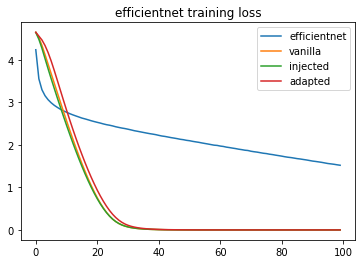

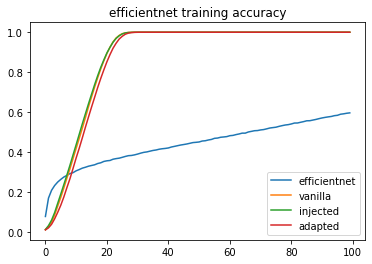

In [10]:
def plot(models, metric):
    for model in models:
        plt.plot(model.history.history['loss'], label=f'{model.name}')
        #plt.plot(model.history.history['val_loss'], label='val_loss', color='red')
    plt.legend()
    plt.title(f'{model_name} training loss')
    plt.savefig(f'./plots/{model_name}/loss.png')
    plt.show()
   

    for model in models:
        plt.plot(model.history.history[f'{metric}'], label=f'{model.name}')
       # plt.plot(model.history.history[f'val_{metric}'], label=f'val_{metric}', color='red')
    plt.legend()
    plt.title(f'{model_name} training accuracy')
    plt.savefig(f'./plots/{model_name}/accuracy.png')
    plt.show()

        
models = [model, vanilla_model, injected_model, adapted_model]
plot(models, 'accuracy')